In [36]:
#Lo primero es importar la librería de pandas en nuestro código, luego de cargar la base de datos podrás pre-visualizarla

# link del ejemplo: https://code.likeagirl.io/an%C3%A1lisis-y-visualizaci%C3%B3n-de-datos-con-pandas-matplotlib-85ee4d7b4cad

# link de mis datos: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

import pandas as pd

data = pd.read_csv('houses_to_rent.csv')

data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [2]:
#Para saber cuentos registros tengo
data.shape

(6080, 14)

In [3]:
#permite ver los datos de cada tabla.
data.count()

Unnamed: 0        6080
city              6080
area              6080
rooms             6080
bathroom          6080
parking spaces    6080
floor             6080
animal            6080
furniture         6080
hoa               6080
rent amount       6080
property tax      6080
fire insurance    6080
total             6080
dtype: int64

In [5]:
#aqui lo que hacemos es hagarar datos y ponemos que los animales aceptados son A y los no aceptados con NA
#esto de la tabla de animal ponemos un orden a esos datos.
d = {'acept' : 'A', 'not acept' : 'NA'}
data['animal'] = data['animal'].apply(lambda x:d[x])

data['animal'].head()

0     A
1     A
2     A
3     A
4    NA
Name: animal, dtype: object

In [7]:
#ahora vemos que los datos ahora estan de forma de una variable
data.animal

0        A
1        A
2        A
3        A
4       NA
        ..
6075     A
6076    NA
6077     A
6078    NA
6079     A
Name: animal, Length: 6080, dtype: object

In [20]:
#describimos los datos
data.describe()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces
count,6080.00000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,3039.50000,0.863322,151.143914,2.492599,2.341612,1.756250
std,1755.28915,0.343535,375.559485,1.129665,1.438860,1.611909
min,0.00000,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1519.75000,1.000000,58.000000,2.000000,1.000000,1.000000
50%,3039.50000,1.000000,100.000000,3.000000,2.000000,1.000000
75%,4559.25000,1.000000,200.000000,3.000000,3.000000,2.000000
max,6079.00000,1.000000,24606.000000,10.000000,10.000000,12.000000


In [25]:
data[data.city == 0]

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1,1,0,64,2,1,1,10,A,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
10,10,0,60,1,1,0,6,A,not furnished,R$480,R$720,R$20,R$10,"R$1,230"
11,11,0,64,1,2,1,4,A,furnished,R$406,"R$1,550",R$0,R$7,"R$1,963"
15,15,0,56,2,1,1,1,A,not furnished,R$345,R$950,R$11,R$13,"R$1,319"
16,16,0,188,2,3,8,-,A,not furnished,R$0,"R$3,010",R$584,R$46,"R$3,640"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6048,6048,0,113,3,2,2,13,A,not furnished,R$960,"R$1,800",R$200,R$23,"R$2,983"
6055,6055,0,306,3,2,2,-,A,not furnished,Incluso,"R$2,500",R$422,R$38,"R$2,960"
6071,6071,0,600,5,5,4,-,A,not furnished,"R$3,300","R$5,000",R$916,R$76,"R$9,292"
6074,6074,0,28,1,1,0,-,NA,furnished,R$0,"R$1,390",R$0,R$18,"R$1,408"


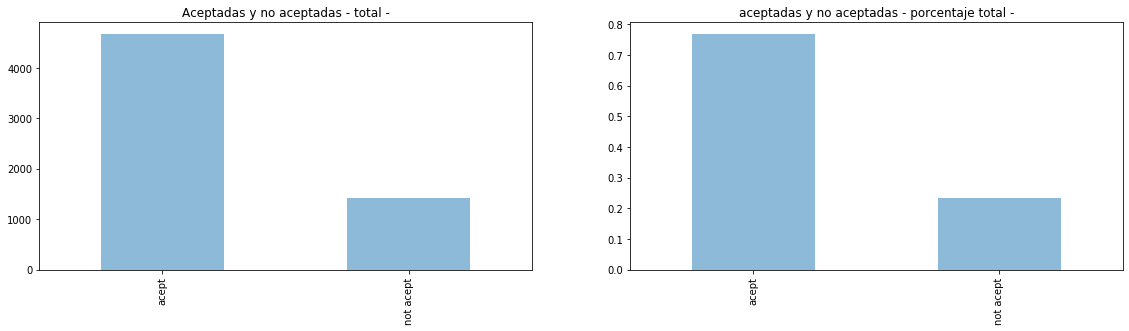

In [62]:
#aqui ahora lo que hacemos es mostrar mediante una grafica el porcentaje total y el total de los animales aceptadas y las no aceptadas
#La gráfica izquierda muestra losaceptados y no aceptados en número mientras que la de la derecha los muestra en porcentajes
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(30,10))

plt.subplot2grid((2,3),(0,0))
data.animal.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Aceptadas y no aceptadas - total -')

plt.subplot2grid((2,3),(0,1))
data.animal.value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('aceptadas y no aceptadas - porcentaje total -')

plt.show()

In [68]:
pd.crosstab(data.animal, data.bathroom)

bathroom,1,2,3,4,5,6,7,8,9,10
animal,,,,,,,,,,
acept,1527,1279,752,625,320,107,45,4,5,2
not acept,745,312,162,115,56,21,3,0,0,0


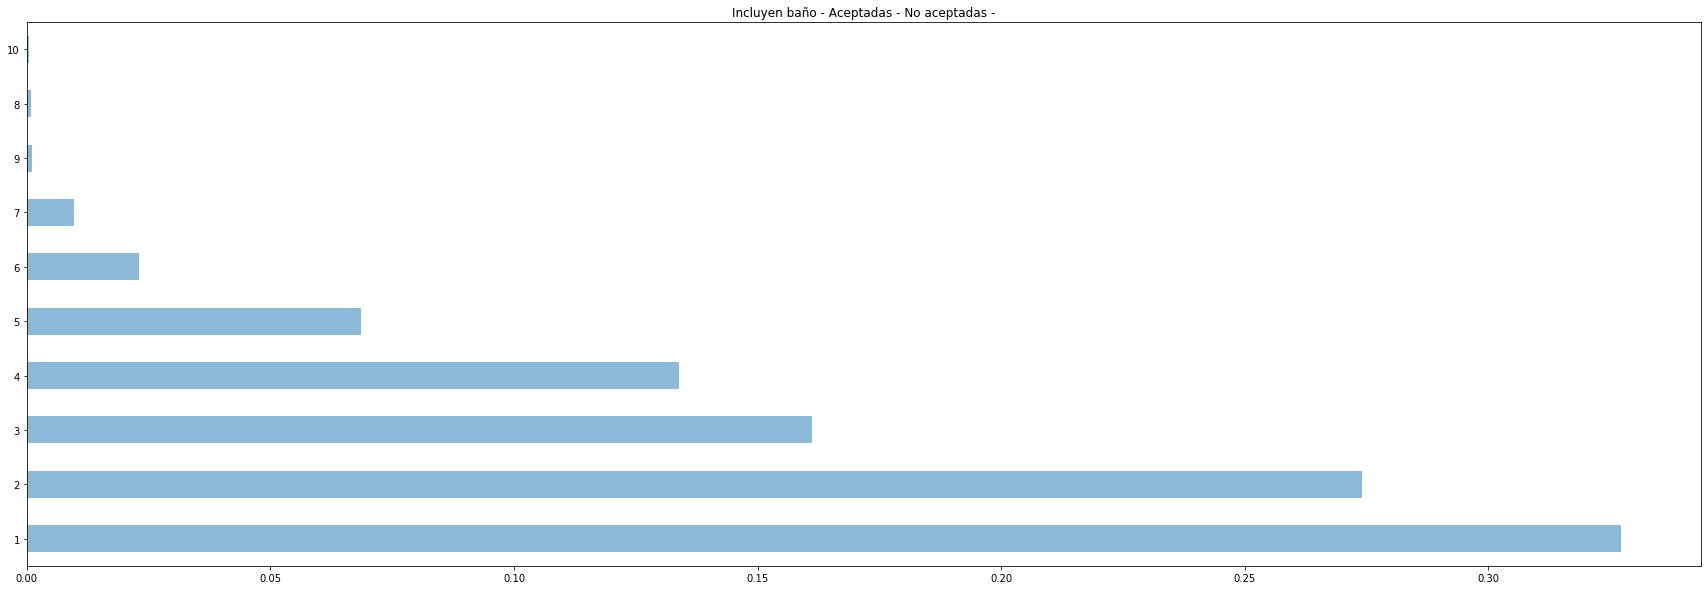

In [69]:
#aqui podemos observar en esta graficas los cuartos en donde se permiten animales tienen baño, y los que tampoco se permiten tiene
#es una forma de ver que apesar de no permitirlos aun a si tiene un baño espesifico
fig = plt.figure(figsize=(30,10))

data.bathroom[data.animal == "acept"].value_counts(normalize = True).plot(kind='barh', alpha=0.5) ###aqui no me permitia agregar un color para identificar
plt.title('Incluyen baño - Aceptadas - No aceptadas -')

plt.show()

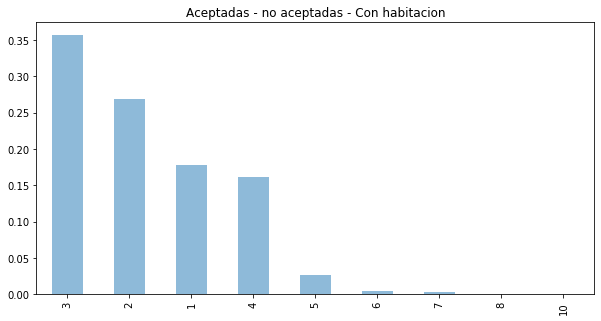

In [70]:
#aqui lo que hacemos es mostrar de los cuartos permitidos animales y no permitidos tiene habitacion.
#aun resulta interesante que apesar de no permitirlos tengan estos derechos.

import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(10,5))

data.rooms[data.animal == "acept"].value_counts(normalize = True).plot(kind='bar', alpha=0.5) ###aqui no me permitia agregar un color para identificar
plt.title('Aceptadas - no aceptadas - Con habitacion')

plt.show()